In [19]:
!pip install tabulate


You should consider upgrading via the 'C:\Users\GhostRider\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
import pandas as pd
#Using data from below citation
# Tsanas,Athanasios and Xifara,Angeliki. (2012). Energy Efficiency. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

df = pd.read_excel('./ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
"""
Features (Independent variables)

X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution

Outputs (Dependent variables)

y1 Heating Load
y2 Cooling Load
"""

In [ ]:
# Exploratory data analysis (EDA)

<AxesSubplot:>

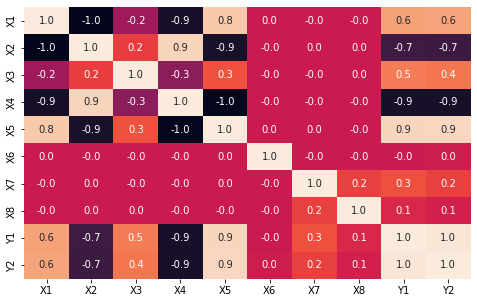

In [7]:
# Finding correlation between features and plotting them
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), cbar = False, annot = True, fmt=".1f")


In [ ]:
"""
X1, X3, X5, and X7 have a substantial correlation with both Y1 and Y2, showing that they influence the output variables.
X1, X5, and X2, X4 have substantial correlations with one another, indicating interdependence among these input variables.
The dependent variables Y1 and Y2 have a significant correlation of 0.98, indicating a strong association between them.
"""

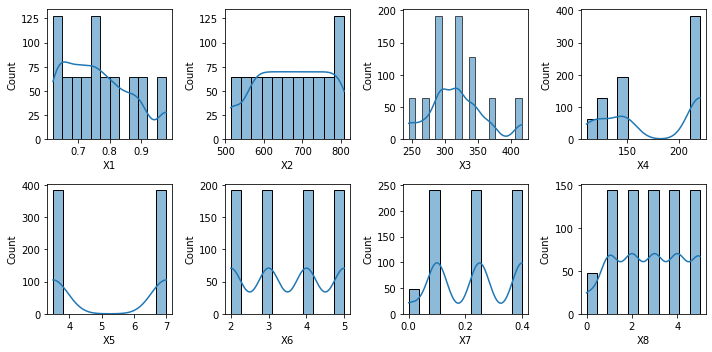

In [8]:
import matplotlib.pyplot as plt

# Define the number of rows and columns you want
n_rows=2
n_cols=4

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:, :-2].columns):
	sns.histplot(df[column], ax=axes[i//n_cols, i % n_cols], kde=True)
plt.tight_layout()


In [ ]:
"""
X3, X4, X5, X6, X7, and X8 are largely categorical in character.
X1 and X2, despite demonstrating some fluctuation, tend to be continuous features.
"""

In [1]:
for col in X_train.columns:
	print(f"{col} : ", X_train[f'{col}'].unique())


NameError: name 'X_train' is not defined

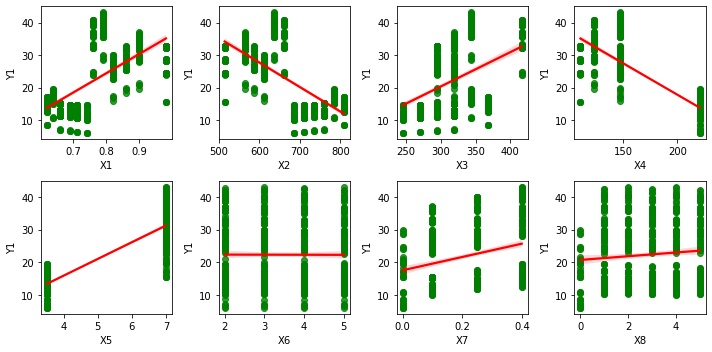

In [11]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
	sns.regplot(x = df[column], y = df['Y1'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.tight_layout()


In [ ]:
#Most features are not linearly separable with regard to the dependent variable Y1.

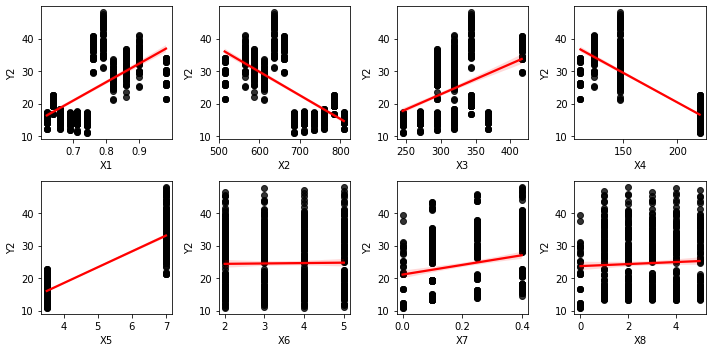

In [12]:
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
for i, column in enumerate(df.iloc[:,:-2].columns):
	sns.regplot(x = df[column], y = df['Y2'],ax=axes[i//n_cols,i%n_cols], scatter_kws={"color": "black" , 'cmap':'jet'}, line_kws={"color": "red"})
plt.tight_layout()


In [ ]:
"""
Similar to 'Y1,' the analysis finds that the associations between the characteristics and 'Y2' are not linearly separable,
suggesting the lack of obvious linear patterns in the data.
"""

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def printPredictions(y_true,y_pred, count):
    print(f"Predictions: ")
    print(y_true.assign(
        Y1_pred = y_pred[:,0],
        Y2_pred = y_pred[:,1] 
    ).head(count).to_markdown(index = False))

def showResults(y_true, y_pred, count = 5):
    print("R2 score: ",r2_score(y_true,y_pred))
    print("Mean squared error: ",mean_squared_error(y_true,y_pred))
    print("Mean absolute error: ",mean_absolute_error(y_true,y_pred))
    printPredictions(y_true,y_pred, count)


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2:], test_size = 0.2, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape, y_test.shape)


(614, 8) (154, 8)
(614, 2) (154, 2)


In [ ]:
# Models which support Multi-output regression

In [20]:
#  Linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
showResults(y_test,linear.predict(X_test))


R2 score:  0.902704368069908
Mean squared error:  9.523374566284932
Mean absolute error:  2.188708662804463
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   18.8627 |   19.7543 |
| 13.17 | 16.39 |   14.0487 |   16.771  |
| 32.82 | 32.78 |   31.3154 |   32.0251 |
| 41.32 | 46.23 |   35.9003 |   36.7024 |
| 16.69 | 19.76 |   15.3348 |   17.276  |


In [21]:
# Random forest regressor
sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor()
rdf.fit(X_train,y_train)
showResults(y_test,rdf.predict(X_test))


R2 score:  0.9790818213840092
Mean squared error:  1.9511090451298705
Mean absolute error:  0.7536402597402597
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.6759 |   17.1106 |
| 13.17 | 16.39 |   13.1278 |   16.1339 |
| 32.82 | 32.78 |   32.5426 |   33.3864 |
| 41.32 | 46.23 |   41.9272 |   42.6586 |
| 16.69 | 19.76 |   16.8288 |   19.8835 |


In [22]:
# Extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor
extra_reg = ExtraTreesRegressor()
extra_reg.fit(X_train,y_train)
showResults(y_test,extra_reg.predict(X_test))


R2 score:  0.9827481131181196
Mean squared error:  1.6107326538311666
Mean absolute error:  0.6834603896103897
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.468  |   17.182  |
| 13.17 | 16.39 |   13.1319 |   16.1294 |
| 32.82 | 32.78 |   32.8335 |   32.9555 |
| 41.32 | 46.23 |   41.8784 |   43.0848 |
| 16.69 | 19.76 |   16.756  |   20.0532 |


In [23]:
#K-neighbours regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
showResults(y_test,knn.predict(X_test))


R2 score:  0.9533456603367618
Mean squared error:  4.594130402597402
Mean absolute error:  1.549850649350649
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |    14.408 |    15.384 |
| 13.17 | 16.39 |    12.92  |    15.776 |
| 32.82 | 32.78 |    30.262 |    30.852 |
| 41.32 | 46.23 |    40.69  |    43.066 |
| 16.69 | 19.76 |    16.946 |    20.164 |


In [ ]:
"""
Given that the data is mostly categorical, the R2 score for Linear Regression is the lowest at 0.902,
while the Extra-Trees Regressor has the greatest R2 score at 0.98.
It is feasible to increase the R2 score by doing hyperparameter tuning.
"""

In [24]:
"""
Using MultiOutputRegressor() to expand the capabilities of regressors 
that aren’t inherently designed for multi-target regression tasks.
"""
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

svm_multi = MultiOutputRegressor(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svm_multi.fit(X_train,y_train)
showResults(y_test,svm_multi.predict(X_test))


R2 score:  0.9876712414729131
Mean squared error:  1.1737865734622686
Mean absolute error:  0.64545622613329
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.4987 |   16.426  |
| 13.17 | 16.39 |   12.9448 |   16.4907 |
| 32.82 | 32.78 |   32.2836 |   32.5228 |
| 41.32 | 46.23 |   41.6524 |   44.4467 |
| 16.69 | 19.76 |   17.0211 |   20.1875 |


In [ ]:
"""
The high R2 score of 0.9877 
indicates the model’s strong performance in explaining the variance in the target variables Y1 and Y2.
"""

In [25]:
# Chained Multi-output Regression 
from sklearn.multioutput import RegressorChain

# Defining the chained multioutput model
svm_chain = RegressorChain(SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))

svm_chain.fit(X_train,y_train)
showResults(y_test,svm_chain.predict(X_test))


R2 score:  0.9770183076559664
Mean squared error:  2.160857985360773
Mean absolute error:  0.8648991134909931
Predictions: 
|    Y1 |    Y2 |   Y1_pred |   Y2_pred |
|------:|------:|----------:|----------:|
| 16.47 | 16.9  |   15.4987 |   17.0196 |
| 13.17 | 16.39 |   12.9448 |   16.1628 |
| 32.82 | 32.78 |   32.2836 |   33.2849 |
| 41.32 | 46.23 |   41.6524 |   43.2883 |
| 16.69 | 19.76 |   17.0211 |   19.9793 |


In [ ]:
# source: GeeksForGeeks, https://www.geeksforgeeks.org/multioutput-regression-in-machine-learning/
# Data : Tsanas,Athanasios and Xifara,Angeliki. (2012). Energy Efficiency. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.